In [1]:
!nvidia-smi

Sun Aug 30 15:23:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0 Off |                  N/A |
| 49%   82C    P2   124W / 250W |  10883MiB / 11175MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:06:00.0 Off |                  N/A |
| 23%   35C    P8     9W / 250W |  10889MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"#"1,2"  


from keras_preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
xtrain.shape

(2098, 256, 256, 3)

In [3]:
import keras
from keras.models import *
from keras.layers import *

#from .config import IMAGE_ORDERING
IMAGE_ORDERING = 'channels_last'




def get_vgg_encoder(input_height=224,  input_width=224, classes=4):

    assert input_height % 32 == 0
    assert input_width % 32 == 0

    if IMAGE_ORDERING == 'channels_first':
        img_input = Input(shape=(3, input_height, input_width))
    elif IMAGE_ORDERING == 'channels_last':
        img_input = Input(shape=(input_height, input_width, 3))

    x = Conv2D(64, (3, 3), activation='relu', padding='same',
               name='block1_conv1', data_format=IMAGE_ORDERING)(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same',
               name='block1_conv2', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool',
                     data_format=IMAGE_ORDERING)(x)
    f1 = x
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same',
               name='block2_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same',
               name='block2_conv2', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool',
                     data_format=IMAGE_ORDERING)(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same',
               name='block3_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same',
               name='block3_conv2', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same',
               name='block3_conv3', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool',
                     data_format=IMAGE_ORDERING)(x)
    f3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block4_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block4_conv2', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block4_conv3', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool',
                     data_format=IMAGE_ORDERING)(x)
    f4 = x

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block5_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block5_conv2', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block5_conv3', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool',
                     data_format=IMAGE_ORDERING)(x)
    f5 = x

    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)
    
    model= Model(inputs = img_input, outputs = x)

    return model









In [4]:
model = get_vgg_encoder(input_height=256,  input_width=256, classes=5)





Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001, beta_1=0.5)


In [6]:

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])



Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [39]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range=40,
        vertical_flip=True,
        horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "../train",
        target_size=(256 , 256),
        batch_size=5,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '../validation',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')



Found 5656 images belonging to 5 classes.
Found 163 images belonging to 5 classes.


In [8]:
from keras.callbacks import ModelCheckpoint
callbacks = [
    ModelCheckpoint('vgg19_aug.h5', verbose=1, save_best_only=True, save_weights_only=True)
]


history = model.fit_generator(train_generator,steps_per_epoch=2000,epochs=100,callbacks=callbacks,
                              validation_data=validation_generator,validation_steps=800)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/100





2000/2000 [==============================] - 872s 436ms/step - loss: 0.9995 - acc: 0.6295 - val_loss: 1.8739 - val_acc: 0.4907
Epoch 2/100
2000/2000 [==============================] - 862s 431ms/step - loss: 0.1106 - acc: 0.9646 - val_loss: 3.5964 - val_acc: 0.5216
Epoch 3/100
2000/2000 [==============================] - 860s 430ms/step - loss: 0.0205 - acc: 0.9928 - val_loss: 3.3701 - val_acc: 0.5154
Epoch 4/100
2000/2000 [==============================] - 861s 430ms/step - loss: 0.0068 - acc: 0.9963 - val_loss: 3.3881 - val_acc: 0.5459
Epoch 5/100
2000/2000 [==============================] - 865s 432ms/step - loss: 0.4669 - acc: 0.8160 - val_loss: 1.8211 - val_acc: 0.2453
Epoch 6/100
2000/2000 [==============================] - 861s 430ms/step - loss: 1.34

Epoch 54/100
2000/2000 [==============================] - 856s 428ms/step - loss: 1.3424 - acc: 0.4701 - val_loss: 1.8252 - val_acc: 0.2456
Epoch 55/100
2000/2000 [==============================] - 856s 428ms/step - loss: 1.3431 - acc: 0.4700 - val_loss: 1.8141 - val_acc: 0.2454
Epoch 56/100
2000/2000 [==============================] - 856s 428ms/step - loss: 1.3427 - acc: 0.4700 - val_loss: 1.8046 - val_acc: 0.2453
Epoch 57/100
2000/2000 [==============================] - 857s 428ms/step - loss: 1.3425 - acc: 0.4696 - val_loss: 1.8051 - val_acc: 0.2454
Epoch 58/100
2000/2000 [==============================] - 858s 429ms/step - loss: 1.3425 - acc: 0.4699 - val_loss: 1.8164 - val_acc: 0.2456
Epoch 59/100
2000/2000 [==============================] - 857s 429ms/step - loss: 1.3435 - acc: 0.4697 - val_loss: 1.8017 - val_acc: 0.2453
Epoch 60/100
2000/2000 [==============================] - 857s 429ms/step - loss: 1.3418 - acc: 0.4705 - val_loss: 1.8149 - val_acc: 0.2456
Epoch 61/100
2000/20

Epoch 86/100
2000/2000 [==============================] - 857s 428ms/step - loss: 1.3429 - acc: 0.4697 - val_loss: 1.8069 - val_acc: 0.2456
Epoch 87/100
2000/2000 [==============================] - 851s 426ms/step - loss: 1.3424 - acc: 0.4701 - val_loss: 1.8011 - val_acc: 0.2453
Epoch 88/100
2000/2000 [==============================] - 857s 429ms/step - loss: 1.3422 - acc: 0.4698 - val_loss: 1.8166 - val_acc: 0.2451
Epoch 89/100
2000/2000 [==============================] - 856s 428ms/step - loss: 1.3434 - acc: 0.4698 - val_loss: 1.8006 - val_acc: 0.2455
Epoch 90/100
2000/2000 [==============================] - 857s 428ms/step - loss: 1.3418 - acc: 0.4703 - val_loss: 1.8095 - val_acc: 0.2450
Epoch 91/100
2000/2000 [==============================] - 857s 429ms/step - loss: 1.3430 - acc: 0.4698 - val_loss: 1.8046 - val_acc: 0.2450
Epoch 92/100
2000/2000 [==============================] - 856s 428ms/step - loss: 1.3427 - acc: 0.4699 - val_loss: 1.8020 - val_acc: 0.2458
Epoch 93/100
2000/20

In [9]:
import pandas as pd
hist_df = pd.DataFrame(history.history) 
hist_csv_file = 'history_vgg.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [9]:
model.load_weights('vgg19_aug.h5')

In [21]:
print(model.evaluate(xtest,ytest))

106/106 [==============================] - 0s 4ms/step
[1.8008958213734176, 0.24528301886792453]


In [22]:
from sklearn.metrics import confusion_matrix,classification_report
from matplotlib import pyplot as plt
pred = model.predict(xtest)
y_true = np.argmax(ytest, axis=-1)
print("Validation Labels")
ass=np.random.randint(0, high=xtest.shape[0], size=5, dtype=int)
print(y_true[ass])
a = model.predict(xtest)
y_pred = np.argmax(a, axis=-1)
print("Validation Prediction")
print(y_pred[ass])
print('Confusion Matrix')
target_names = ['cbb', 'cbsd','cgm','cmd','healthy'] 
print(confusion_matrix(y_true, y_pred))
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

Validation Labels
[3 3 4 3 0]
Validation Prediction
[3 3 3 3 3]
Confusion Matrix
[[ 0  0  0 14  0]
 [ 0  0  0 24  0]
 [ 0  0  0 19  0]
 [ 0  0  0 26  0]
 [ 0  0  0 23  0]]
Classification Report
              precision    recall  f1-score   support

         cbb       0.00      0.00      0.00        14
        cbsd       0.00      0.00      0.00        24
         cgm       0.00      0.00      0.00        19
         cmd       0.25      1.00      0.39        26
     healthy       0.00      0.00      0.00        23

    accuracy                           0.25       106
   macro avg       0.05      0.20      0.08       106
weighted avg       0.06      0.25      0.10       106



/home/sami/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('vgg_simple.png',dpi=95,quality=95)
    plt.show()
    

In [ ]:
plot_confusion_matrix(cm,labels,title='Confusion matrix',cmap=None,normalize=True)

In [19]:
import pandas as pd
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history_vgg.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history_vgg.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

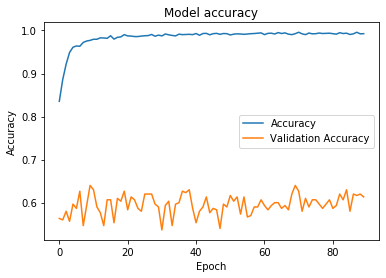

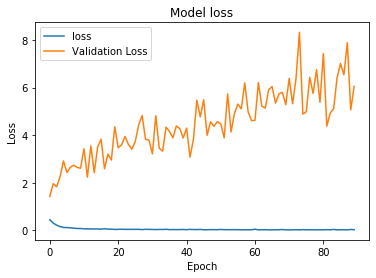

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()
plt.savefig(model.name+'_accuracy.png')


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()
plt.savefig(model.name+'_loss.png')